# Introduction
In this notebook we would like to have a simulation for different solutions of Monty Hall problems. 

What is the Monty Hall problem?
> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

There are two strategies for the contestant:
1. Sticking with his/her initial choice.
2. Switching to the other available choice.

# Import

In [23]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

# Simulation

In [24]:
np.random.seed(123)

In [25]:
def generate_outcomes(n_rounds: int, n_outcomes: int = 3):
    winner = np.random.randint(low=0, high=n_outcomes, size=n_rounds)

    return winner

In [26]:
def simulate_first_strategy(n_rounds: int, n_outcomes: int = 3):
    winner_index = generate_outcomes(n_rounds=n_rounds)
    choices = np.random.randint(low=0, high=n_outcomes, size=n_rounds)

    success = choices == winner_index
    success_proba = np.cumsum(success) / np.arange(1, n_rounds+1)

    return success_proba

def simulate_second_strategy(n_rounds: int, n_outcomes: int = 3):
    winner_index = generate_outcomes(n_rounds=n_rounds)
    choices = np.random.randint(low=0, high=n_outcomes, size=n_rounds)

    empty_boxes = np.apply_along_axis(lambda x: {0, 1, 2}.difference(set(x)), 
                                      axis=0, 
                                      arr=winner_index.reshape(1, -1))

    # pick the other partition
    other_partition = np.apply_along_axis(lambda x: {0, 1, 2}.difference(set(x)), 
                                          axis=0, 
                                          arr=choices.reshape(1, -1))

    # If other_partition is not same as empty_boxes per trial then other partition should contain the winner.
    # During trial an empty box of the other partition is removed and therefore the box with prize is chosen. 
    other_partition_contains_winner = other_partition != empty_boxes
    success_proba = np.cumsum(other_partition_contains_winner) / np.arange(1, n_rounds+1)
    
    return success_proba

Text(0, 0.5, 'Success probability at trail index')

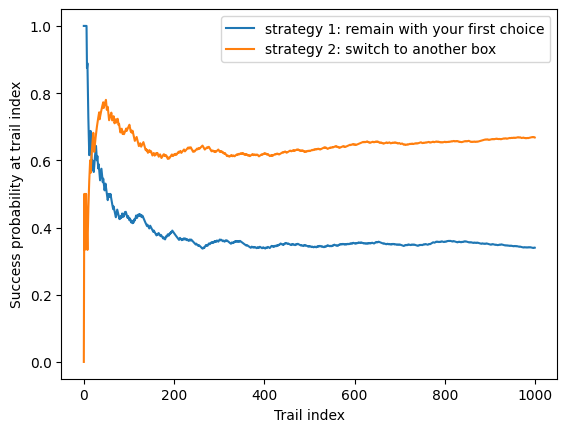

In [37]:
fig, ax = plt.subplots()
skip_index = 0
N = 1000
ax.plot(simulate_first_strategy(N)[skip_index:], label="strategy 1: remain with your first choice")
ax.plot(simulate_second_strategy(N)[skip_index:], label="strategy 2: switch to another box")

ax.legend()
ax.set_xlabel("Trail index")
ax.set_ylabel("Success probability at trail index")